In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research', 'C:\\Users\\Martin\\Projects\\OSRS_Research', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [83]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [128]:
item = "Teak_plank"

In [129]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Oak_plank', 11), ('Mahogany_plank', 11), ('Teak_seed', 9), ('Teak_pyre_logs', 9), ('Teak_bird_house', 9)]
['Oak_plank', 'Mahogany_plank', 'Teak_seed', 'Teak_pyre_logs', 'Teak_bird_house']


In [130]:
items.getPrices(item)[-10:]

[906, 905, 922, 932.5, 943, 920, 920, 937, 928, 909]

In [131]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:PLAYER-OWNED_HOUSES!',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Teak_plank.png',
 'lowAlch': '200',
 'examine': 'A plank of fine teak',
 'highAlch': '300',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'False',
 'weight': '0.8',
 'released': '31 May 2006',
 'storeCurrency': 'N/A',
 'name': 'Teak_plank',
 'alchable': 'True',
 'exchangePrice': '917',
 'tradeable': 'True',
 'buyLimit': '13000',
 'noteable': 'True',
 'stackable': 'False'}

1425 6


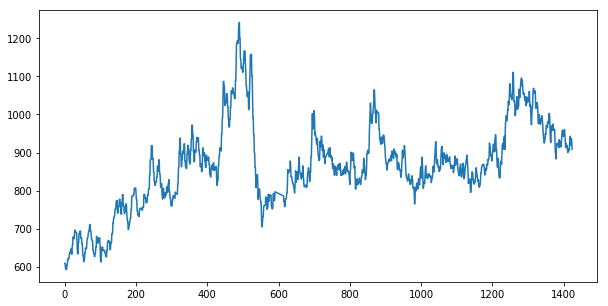

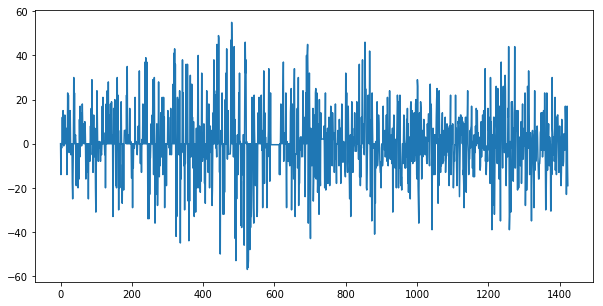

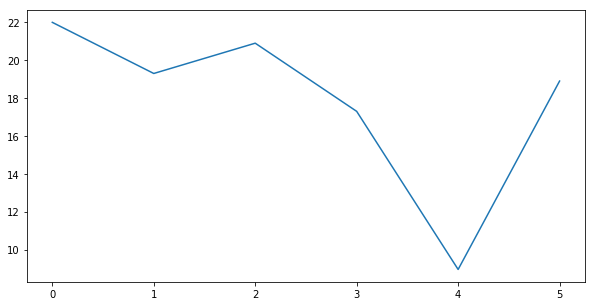

In [132]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
quant = items.getQuants(item)
print(len(prices),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices,label='Price')
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1414 1414


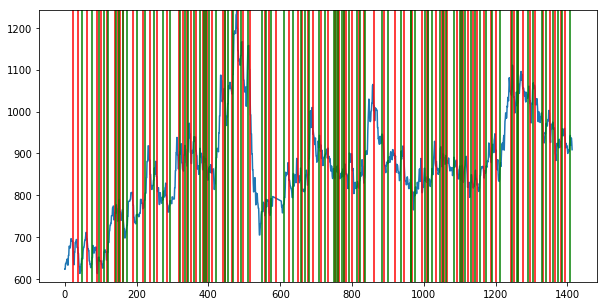

In [133]:
ma12 = items.sma(prices,12)
ma3 = items.sma(prices,3)[-1*len(ma12):]
print(len(ma3),len(ma12))

smaSell = []
smaBuy = []
for i in range(1,len(ma12)):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        smaSell.append(i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        smaBuy.append(i)
        
smaSignals = [0]*len(ma12)
for a in smaSell:
    smaSignals[a] = -1
for a in smaBuy:
    smaSignals[a] = 1
        
plt.plot(prices[-1*len(ma12):])
top = max(prices)+1
for c in smaSell:
    plt.plot([c,c],[0,top],'r')
for c in smaBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

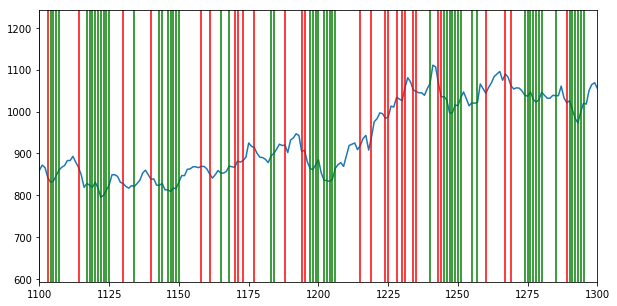

In [134]:
kSlow, D = items.stochOscil(prices)
kSlow = kSlow[-1*len(D):]
    
stochSell = []
stochBuy = []
for i in range(1,len(D)):
    if kSlow[i]<20:
        stochBuy.append(i)
    elif kSlow[i]<80 and D[i]<80 and kSlow[i-1]<D[i-1] and kSlow[i]>D[i]:
        stochBuy.append(i)
    if kSlow[i-1]>kSlow[i] and kSlow[i-1]>90:
        stochSell.append(i)
        
stochSignals = [0]*len(D)
for a in stochSell:
    stochSignals[a] = -1
for a in stochBuy:
    stochSignals[a] = 1
        
plt.plot(prices[-1*len(D):])
top = max(prices)+1
for c in stochSell:
    plt.plot([c,c],[0,top],'r')
for c in stochBuy:
    plt.plot([c,c],[0,top],'g')
plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

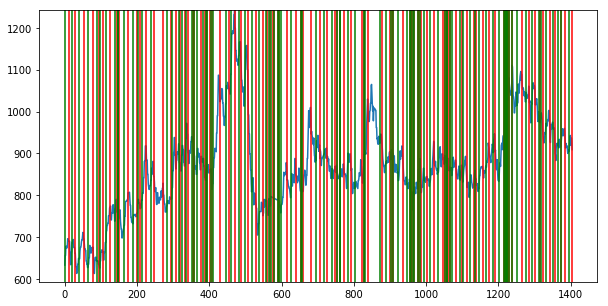

In [135]:
mom, momMA = items.momentum(prices)
mom = mom[-1*len(momMA):]

momSell = []
momBuy = []
for i in range(1,len(momMA)):
    if mom[i-1]>momMA[i-1] and mom[i]<momMA[i]:
        momSell.append(i)
    if mom[i-1]<momMA[i-1] and mom[i]>momMA[i]:
        momBuy.append(i)

momSignals = [0]*len(momMA)
for a in momSell:
    momSignals[a] = -1
for a in momBuy:
    momSignals[a] = 1
        
plt.plot(prices[-1*len(momMA):])
top = max(prices)+1
for c in momSell:
    plt.plot([c,c],[0,top],'r')
for c in momBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

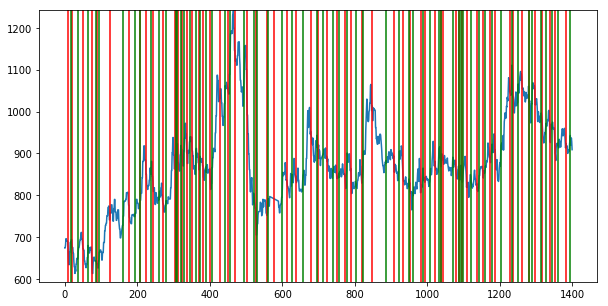

In [136]:
ema9, macd = items.macd(prices)
ema9 = ema9[-1*len(macd):]

macdSell = []
macdBuy = []
for i in range(1,len(macd)):
    if ema9[i-1]>macd[i-1] and ema9[i]<macd[i]:
        macdSell.append(i)
    if ema9[i-1]<macd[i-1] and ema9[i]>macd[i]:
        macdBuy.append(i)
        
macdSignals = [0]*len(macd)
for a in macdSell:
    macdSignals[a] = -1
for a in macdBuy:
    macdSignals[a] = 1
        
plt.plot(prices[-1*len(macd):])
top = max(prices)+1
for c in macdSell:
    plt.plot([c,c],[0,top],'r')
for c in macdBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

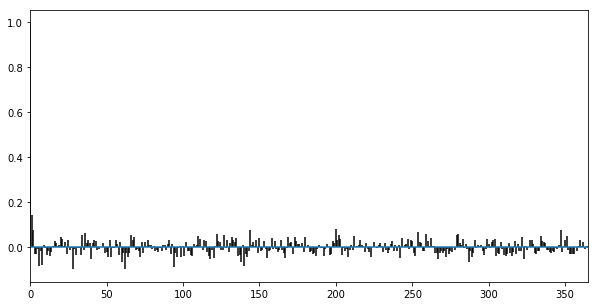

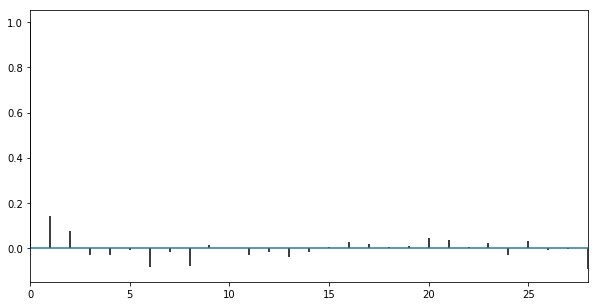

In [137]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [138]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

features = [changes,momSignals,smaSignals,stochSignals,macdSignals]
#features = [changes]
#features = [smaSignals,momSignals,stochSignals,macdSignals]
#features = [ma3,ma12,ema9,macd,mom,momMA,kSlow,D]

fsizes = [7,3,3,3,3]

x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(len(features)):
    features[i] = features[i][-1*fMin:]

s1 = int(len(features[0])*.8)
s2  =int(len(features[0])*.9)
for i in range(len(features)):
    features[i][:s2] = list(scaler.fit_transform(np.array(features[i][:s2]).reshape(-1, 1)).reshape(len(features[i][:s2]),))
    features[i][s2:] = list(scaler.fit_transform(np.array(features[i][s2:]).reshape(-1, 1)).reshape(len(features[i][s2:]),))
        
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        #print(type(xelem),type(features[j][i-fsizes[j]:i]))
        xelem = xelem + list(features[j][i-fsizes[j]:i])
    x.append(xelem)
    y.append(classify(changes[i]))
    p.append(prices[i])
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
#y = keras.utils.to_categorical(y, num_classes=2)

[-0.05357142857142863, 0.017857142857142794, 0.1428571428571428, 0.28571428571428564, 0.017857142857142794, -0.07142857142857148, 0.017857142857142794, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0] [0.5294117647058822, 0.33823529411764697, 0.33823529411764697, -0.6470588235294119, 0.02941176470588225, 0.5294117647058822, -0.23529411764705893, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
19 19
0 0


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\loca

1120 1120 140 140 133 133 133
19 [-0.05357143  0.01785714  0.14285714  0.28571429  0.01785714 -0.07142857
  0.01785714  0.          0.         -1.          0.          0.
  0.          0.          0.         -1.          0.          0.
  0.        ]
0
19 [-2.05882353e-01 -5.58823529e-01 -2.05882353e-01  1.17647059e-01
 -1.04083409e-16 -1.76470588e-01 -2.64705882e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
0


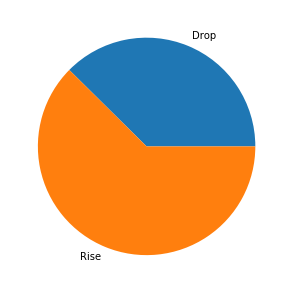

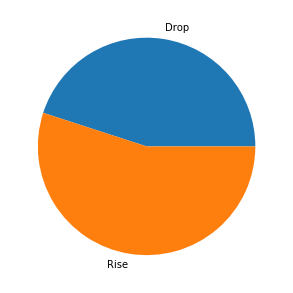

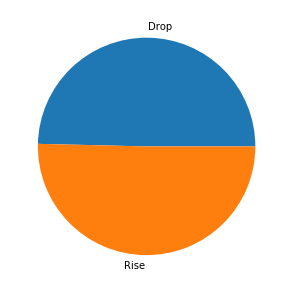

In [140]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [141]:
model = Sequential()
model.add(Dense(int(size), input_dim=size, activation='sigmoid'))
model.add(Dense(int(size), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_18 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 20        
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=100,
            batch_size=8)

Train on 1120 samples, validate on 140 samples
Epoch 1/100
1120/1120 [==============================] - 1s 775us/step - loss: 0.6628 - acc: 0.6241 - val_loss: 0.7050 - val_acc: 0.5500
Epoch 2/100
1120/1120 [==============================] - 0s 153us/step - loss: 0.6617 - acc: 0.6241 - val_loss: 0.6973 - val_acc: 0.5500
Epoch 3/100
1120/1120 [==============================] - 0s 150us/step - loss: 0.6598 - acc: 0.6241 - val_loss: 0.6884 - val_acc: 0.5500
Epoch 4/100
1120/1120 [==============================] - 0s 148us/step - loss: 0.6595 - acc: 0.6241 - val_loss: 0.6939 - val_acc: 0.5500
Epoch 5/100
1120/1120 [==============================] - 0s 154us/step - loss: 0.6583 - acc: 0.6241 - val_loss: 0.7006 - val_acc: 0.5500
Epoch 6/100
1120/1120 [==============================] - 0s 148us/step - loss: 0.6567 - acc: 0.6241 - val_loss: 0.6893 - val_acc: 0.5500
Epoch 7/100
1120/1120 [==============================] - 0s 153us/step - loss: 0.6554 - acc: 0.6241 - val_loss: 0.6952 - val_acc: 0

1120/1120 [==============================] - 0s 142us/step - loss: 0.6444 - acc: 0.6241 - val_loss: 0.6939 - val_acc: 0.5714
Epoch 61/100
1120/1120 [==============================] - 0s 143us/step - loss: 0.6447 - acc: 0.6268 - val_loss: 0.6914 - val_acc: 0.5571
Epoch 62/100
1120/1120 [==============================] - 0s 143us/step - loss: 0.6439 - acc: 0.6277 - val_loss: 0.6954 - val_acc: 0.5714
Epoch 63/100
1120/1120 [==============================] - 0s 144us/step - loss: 0.6446 - acc: 0.6232 - val_loss: 0.6961 - val_acc: 0.5714
Epoch 64/100
1120/1120 [==============================] - 0s 146us/step - loss: 0.6438 - acc: 0.6196 - val_loss: 0.6896 - val_acc: 0.5571
Epoch 65/100
1120/1120 [==============================] - 0s 152us/step - loss: 0.6440 - acc: 0.6223 - val_loss: 0.6931 - val_acc: 0.5714
Epoch 66/100
1120/1120 [==============================] - 0s 150us/step - loss: 0.6445 - acc: 0.6125 - val_loss: 0.6968 - val_acc: 0.5643
Epoch 67/100
1120/1120 [=======================

In [143]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

133/133 [==============================] - 0s 489us/step
['loss', 'acc']
[0.7470810553409103, 0.5112781954887218]
61 59 7 6 133
Accuracy:  0.5112781954887218
Precision:  0.5083333333333333
Recall:  0.9104477611940298
F1:  0.6524064171122994


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


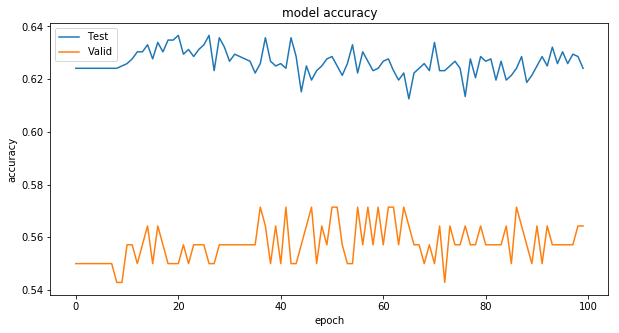

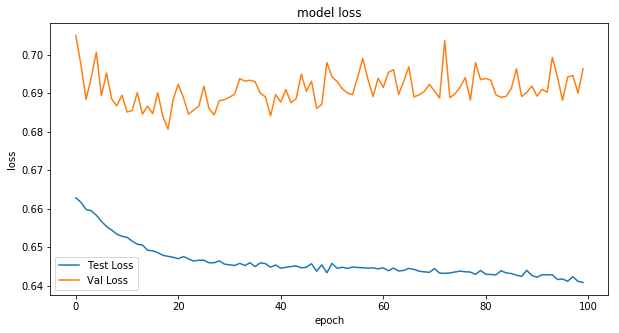

In [144]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [145]:
print(y_test[:20])
print(p_test[:20])

[0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1]
[1037. 1047. 1029. 1023. 1028. 1046. 1039. 1032. 1032. 1039. 1038. 1038.
 1061. 1033. 1021. 1026. 1005.  984.  973.  999.]


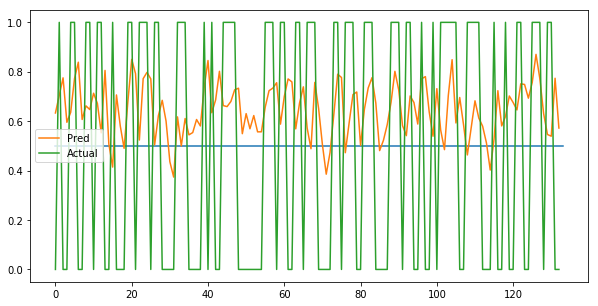

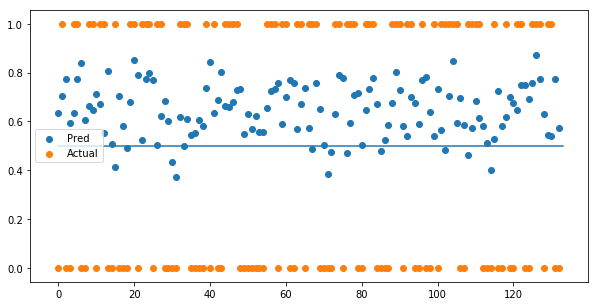

In [146]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test)], [.5, .5])
plt.scatter(range(len(y_test)),y_pred,label='Pred')
plt.scatter(range(len(y_test)),y_test,label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [147]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

133 133 133
100000
1000000
10000000
100000000
1000000000


In [148]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 -0.15695 0.06
	Model No T
	 -0.17354 0
	Persistance
	 -0.003175
	Perfect
	 0.87492
	Buy and Hold
	 -0.12288
1000000
	Model
	 -0.157843 0.06
	Model No T
	 -0.174571 0
	Persistance
	 -0.0031775
	Perfect
	 0.878991
	Buy and Hold
	 -0.123392
10000000
	Model
	 -0.1579023 0.06
	Model No T
	 -0.174635 0
	Persistance
	 -0.00314235
	Perfect
	 0.8022617
	Buy and Hold
	 -0.1234304
100000000
	Model
	 -0.10830873 0.06
	Model No T
	 -0.1265077 0
	Persistance
	 -0.01768
	Perfect
	 0.13013
	Buy and Hold
	 -0.01664
1000000000
	Model
	 -0.0039195 0.06
	Model No T
	 -0.0049725 0
	Persistance
	 -0.001768
	Perfect
	 0.013013
	Buy and Hold
	 -0.001664


133 132 132 133


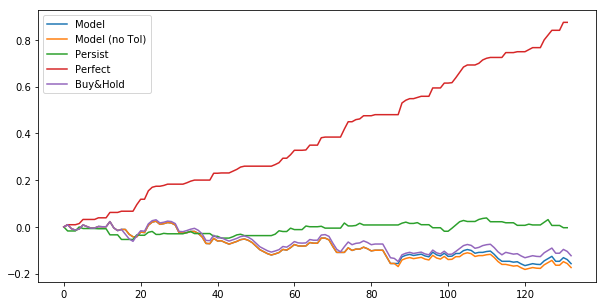

133 132 132 133


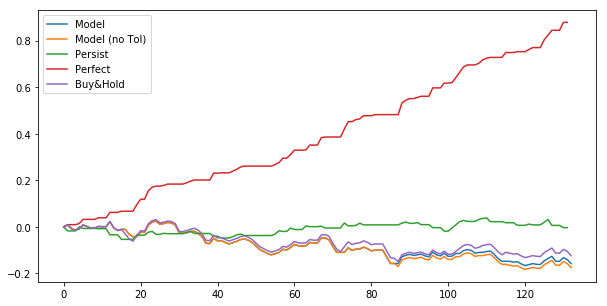

133 132 132 133


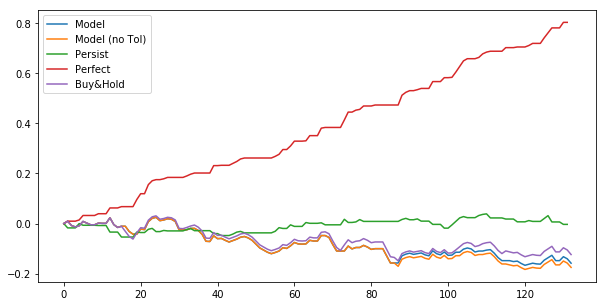

133 132 132 133


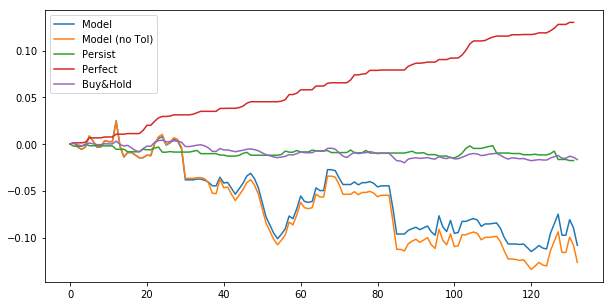

133 132 132 133


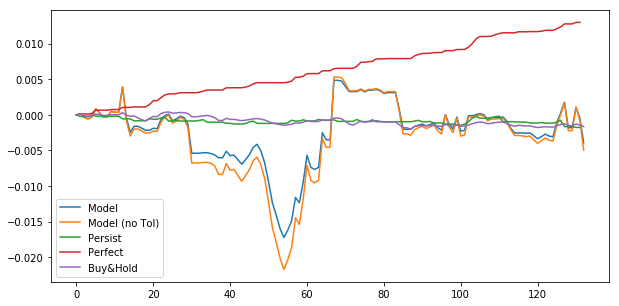

In [149]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()